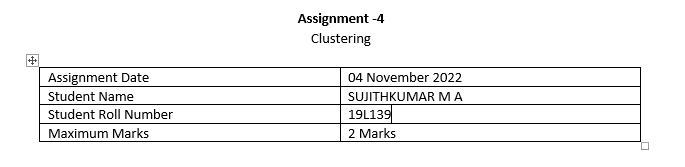

**Task 1 - Downloading the dataset**

In [ ]:
!gdown https://drive.google.com/u/0/uc?id=1Z21e5HOZZR81sC_dnfCDPDMEzs-w8ysr&export=download

Downloading...
From: https://drive.google.com/u/0/uc?id=1Z21e5HOZZR81sC_dnfCDPDMEzs-w8ysr
To: /content/Mall_Customers.csv
100% 3.98k/3.98k [00:00<00:00, 5.29MB/s]


**Task 2 - Loading the dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
dataset=pd.read_csv("Mall_Customers.csv")

In [ ]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Task 3.1 - Univariate Analysis**

Text(0.5, 1.0, 'Distribution of the Annual Income (k$)')

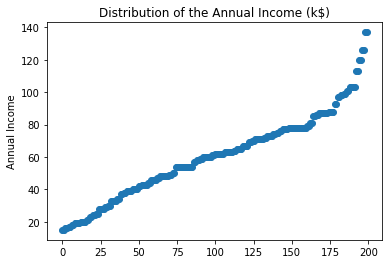

In [14]:
plt.scatter(dataset.index,dataset['Annual Income (k$)'])
plt.ylabel('Annual Income')
plt.title('Distribution of the Annual Income (k$)')

Text(0.5, 1.0, 'Distribution of the Age')

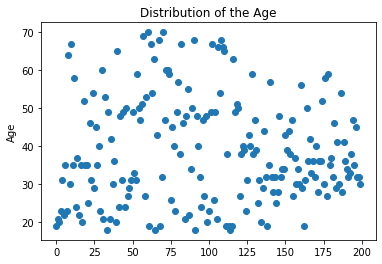

In [15]:
plt.scatter(dataset.index,dataset['Age'])
plt.ylabel('Age')
plt.title('Distribution of the Age')

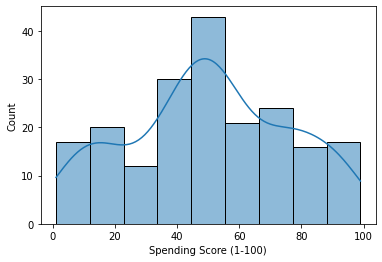

In [17]:
sns.histplot(dataset['Spending Score (1-100)'],kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


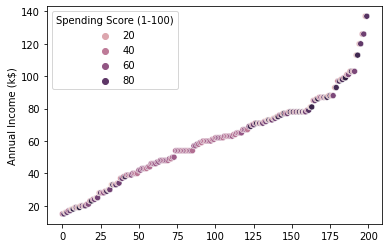

In [18]:
sns.scatterplot(dataset.index,y=dataset['Annual Income (k$)'],hue=dataset['Spending Score (1-100)'])

**Task 3.2 - Bivariate Analysis**

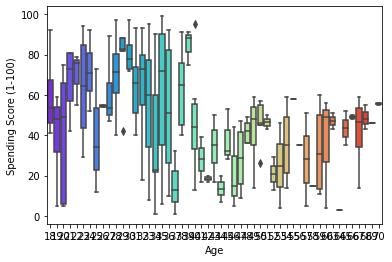

In [19]:
sns.boxplot(x='Age',y='Spending Score (1-100)',data=dataset,palette='rainbow')

***Correlation Matrix***

In [20]:
dataset.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


**Heatmap of Correlation between any two variables**

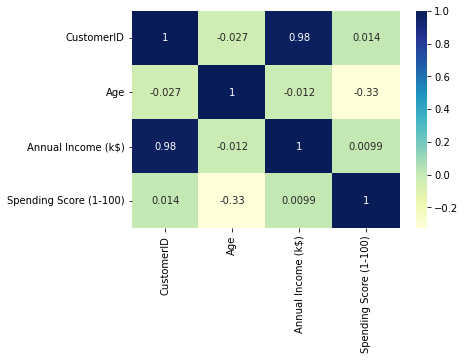

In [21]:
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)

**Task 3.3 - Multivariate Analysis**

In [22]:
columns=list(dataset.columns)

In [23]:
print(columns)

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


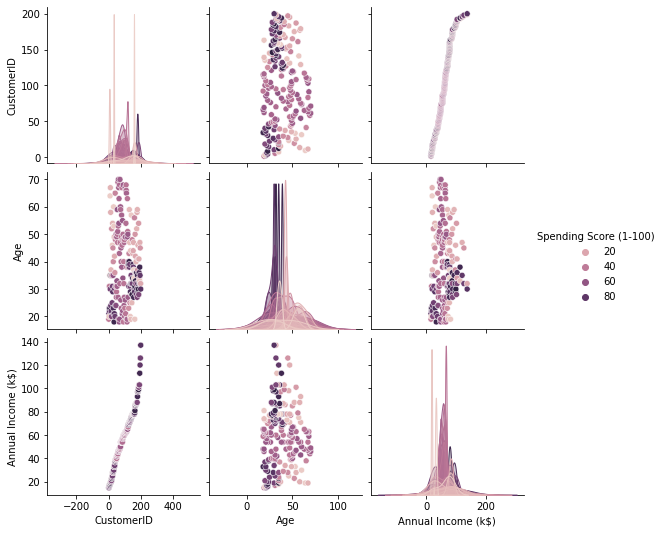

In [24]:
sns.pairplot(data=dataset[columns],hue='Spending Score (1-100)')

**Task 4 - Descriptive Statistics**

In [25]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


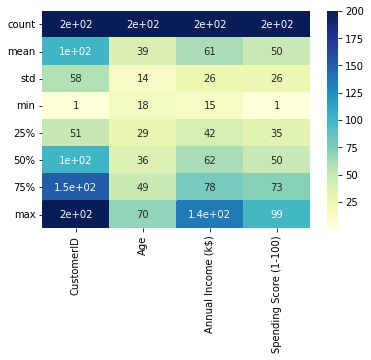

In [26]:
sns.heatmap(dataset.describe(), cmap="YlGnBu", annot=True)

**Task 5 - Replacing the missing values**

In [27]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [28]:
dataset.fillna(0)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


It has been identified that there are no missing values in the dataset

**Task 6 - Finding and replacing the outliers**

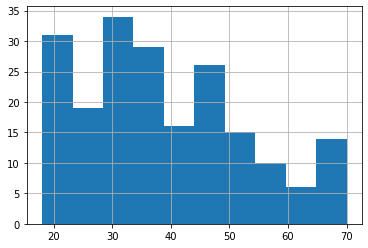

In [30]:
dataset['Age'].hist()

In [31]:
dataset['Age'].skew()

0.48556885096681657

In [32]:
columns=dataset.columns
for i in columns:
    try:
      skew1=dataset[i].skew()
      print("The skew of {} is {}".format(i,str(skew1)))
      if skew1 > 3:
        median = float(dataset[i].median())
        dataset[i] = np.where(dataset[i] > 0.45, median, dataset[i])
    except:
      print()

The skew of CustomerID is 0.0

The skew of Age is 0.48556885096681657
The skew of Annual Income (k$) is 0.3218425498619055
The skew of Spending Score (1-100) is -0.047220201374263374


In [33]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [35]:
dataset['Age'].skew()

0.48556885096681657

***The skew of the height is now reduced. i.e., the outliers are replaced***

**Task 7 - Check for Categorical columns and Perform Encoding**

In [36]:
dataset['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [39]:
label_map={'Male':0,'Female':1} #Label Encoding for the Column - 'Gender'

In [40]:
def change(c):
  if c=='Male':
    return 0
  elif c=='Female':
    return 1
  else:
    return 2

In [41]:
dataset['Gender']=dataset['Gender'].apply(change)

In [42]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


**Task 8 - Split the data into dependent and independent variables**

In [43]:
X=dataset[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']].values

In [44]:
X

array([[  0,  19,  15,  39],
       [  0,  21,  15,  81],
       [  1,  20,  16,   6],
       [  1,  23,  16,  77],
       [  1,  31,  17,  40],
       [  1,  22,  17,  76],
       [  1,  35,  18,   6],
       [  1,  23,  18,  94],
       [  0,  64,  19,   3],
       [  1,  30,  19,  72],
       [  0,  67,  19,  14],
       [  1,  35,  19,  99],
       [  1,  58,  20,  15],
       [  1,  24,  20,  77],
       [  0,  37,  20,  13],
       [  0,  22,  20,  79],
       [  1,  35,  21,  35],
       [  0,  20,  21,  66],
       [  0,  52,  23,  29],
       [  1,  35,  23,  98],
       [  0,  35,  24,  35],
       [  0,  25,  24,  73],
       [  1,  46,  25,   5],
       [  0,  31,  25,  73],
       [  1,  54,  28,  14],
       [  0,  29,  28,  82],
       [  1,  45,  28,  32],
       [  0,  35,  28,  61],
       [  1,  40,  29,  31],
       [  1,  23,  29,  87],
       [  0,  60,  30,   4],
       [  1,  21,  30,  73],
       [  0,  53,  33,   4],
       [  0,  18,  33,  92],
       [  1,  

In [45]:
columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

**Task 8 - Scale the independent variables**


In [46]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
scaler = MinMaxScaler(feature_range=(0,1))

In [54]:
X_scaled=scaler.fit_transform(X)

In [55]:
X_scaled

array([[0.        , 0.01923077, 0.        , 0.3877551 ],
       [0.        , 0.05769231, 0.        , 0.81632653],
       [1.        , 0.03846154, 0.00819672, 0.05102041],
       [1.        , 0.09615385, 0.00819672, 0.7755102 ],
       [1.        , 0.25      , 0.01639344, 0.39795918],
       [1.        , 0.07692308, 0.01639344, 0.76530612],
       [1.        , 0.32692308, 0.02459016, 0.05102041],
       [1.        , 0.09615385, 0.02459016, 0.94897959],
       [0.        , 0.88461538, 0.03278689, 0.02040816],
       [1.        , 0.23076923, 0.03278689, 0.7244898 ],
       [0.        , 0.94230769, 0.03278689, 0.13265306],
       [1.        , 0.32692308, 0.03278689, 1.        ],
       [1.        , 0.76923077, 0.04098361, 0.14285714],
       [1.        , 0.11538462, 0.04098361, 0.7755102 ],
       [0.        , 0.36538462, 0.04098361, 0.12244898],
       [0.        , 0.07692308, 0.04098361, 0.79591837],
       [1.        , 0.32692308, 0.04918033, 0.34693878],
       [0.        , 0.03846154,

**Task 9 - K Means Clustering**

In [59]:
from sklearn.cluster import KMeans

In [61]:
kmeans = KMeans(3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [63]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

**Task 10 - Add the Cluster Data with the Primary Dataset**

Text(0, 0.5, 'Spending Score (1-100)')

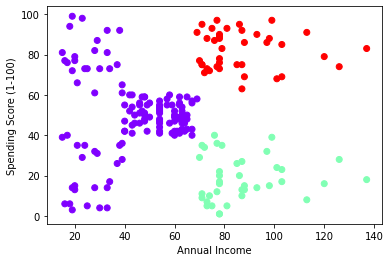

In [67]:
data_with_clusters = dataset.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Annual Income (k$)'],data_with_clusters['Spending Score (1-100)'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')

In [74]:
data_with_clusters

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,0,19,15,39,0
1,2,0,21,15,81,0
2,3,1,20,16,6,0
3,4,1,23,16,77,0
4,5,1,31,17,40,0
...,...,...,...,...,...,...
195,196,1,35,120,79,2
196,197,1,45,126,28,1
197,198,0,32,126,74,2
198,199,0,32,137,18,1


**Task 11 - Split the data into dependent and independent variables**

In [70]:
X=data_with_clusters[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']].values

In [71]:
X

array([[  0,  19,  15,  39],
       [  0,  21,  15,  81],
       [  1,  20,  16,   6],
       [  1,  23,  16,  77],
       [  1,  31,  17,  40],
       [  1,  22,  17,  76],
       [  1,  35,  18,   6],
       [  1,  23,  18,  94],
       [  0,  64,  19,   3],
       [  1,  30,  19,  72],
       [  0,  67,  19,  14],
       [  1,  35,  19,  99],
       [  1,  58,  20,  15],
       [  1,  24,  20,  77],
       [  0,  37,  20,  13],
       [  0,  22,  20,  79],
       [  1,  35,  21,  35],
       [  0,  20,  21,  66],
       [  0,  52,  23,  29],
       [  1,  35,  23,  98],
       [  0,  35,  24,  35],
       [  0,  25,  24,  73],
       [  1,  46,  25,   5],
       [  0,  31,  25,  73],
       [  1,  54,  28,  14],
       [  0,  29,  28,  82],
       [  1,  45,  28,  32],
       [  0,  35,  28,  61],
       [  1,  40,  29,  31],
       [  1,  23,  29,  87],
       [  0,  60,  30,   4],
       [  1,  21,  30,  73],
       [  0,  53,  33,   4],
       [  0,  18,  33,  92],
       [  1,  

In [72]:
Y=data_with_clusters['Clusters'].values

In [73]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

**Task 12 - Train - Test Split**

In [50]:
from sklearn.model_selection import train_test_split

In [75]:
x_train,x_test,y_train,y_test=train_test_split(X,Y)

In [76]:
x_train.shape

(150, 4)

In [77]:
x_test.shape

(50, 4)

**Task 13 - Building the Model**

In [80]:
from sklearn.linear_model import LogisticRegression

In [82]:
model=LogisticRegression()

**Task 14 - Train the Model**

In [83]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

**Task 15 - Test the Model**

In [84]:
predicted=model.predict(x_test)

In [85]:
predicted

array([0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 2, 0, 0], dtype=int32)

In [86]:
y_test

array([0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 2, 0, 0], dtype=int32)

**Task 16 - Measure the performance using Evaluation Metrics**

In [87]:
from sklearn.metrics import classification_report

In [88]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, predicted, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        30
     class 1       1.00      1.00      1.00        12
     class 2       1.00      1.00      1.00         8

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

